This notebook explores the concepts of low-pass filtering and high-pass filtering.

# Low-pass filtering

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Let us consider a signal that is unfortunately noisy:

[-0.21707674  0.53108953  0.03980596 -0.08886051  0.55853343  0.11596648
 -0.16404896 -0.00515807 -0.18691227  0.12636642]


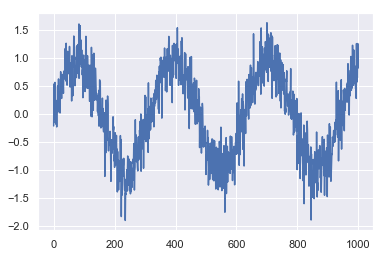

In [7]:
times = np.arange(1000)
signal = 0.3 * np.random.randn(len(times)) + np.sin(0.02 * times)
print(signal[:10])

plt.plot(signal)
plt.show()

Fortunately, we know that the noisy part of the signal can be *filtered* out
using a low-pass filter. A filter can be designed and applied using `scipy.signal` easily.
In the below code we design a third-order low-pass filter with cut-off frequency $0.1 \mathrm{rad}$.

To understand the cut-off frequency, it is important to review a few concepts. The first
and most important concept is a signal in the time-domain:
$$
f(t), -\infty \le t \le \infty.
$$
Recall the concept of the Fourier transform, which captures the energy content
of the signal at given frequencies
$$
F(\omega), -\infty \le \omega \le \infty.
$$

A signal is $\Omega_N$-band limited if the energy content for any $|\omega| > \Omega_N$ is zero.

The famous Sampling Theorem states that by sampling this signal with sampling duration $T_s = \pi / \Omega_N$,
one does not "lose" any information in the continous-time to discrete-time conversion. Hence, suppose 
we samplea continous-time signal at $T_s$, the Nyquist frequency $\pi / T_s$ is the highest possible angular
velocity that remains distinguisable after sampling. Note that the corresponding digital frequency is $\pi$.


In `scipy`'s convention, `Wd` is scaled w.r.t the Nyquist frequency. If `Wd` is 1, the cut-off frequency equals the Nyquist frequency.

Alternatively, we can input the sampling frequency (in Hz) of the signal as $fs$ and the cut-off frequency as $Wd$.

In [52]:
import scipy.signal

frequency_sampling = 100
frequency_cutoff = 5

# construct the low-pass filter
low_pass_filter = scipy.signal.butter(3, frequency_cutoff, fs=frequency_sampling)
print("numerator:   %s\ndenominator: %s" % (low_pass_filter[0], low_pass_filter[1]))

numerator:   [0.00289819 0.00869458 0.00869458 0.00289819]
denominator: [ 1.         -2.37409474  1.92935567 -0.53207537]


Curious about what extract is a low pass filter? Turn out for in this function, the return value are the denominator and enumerator of the discrete-time transfer function of the Butterworth low-pass filter. 

Now, let's try to apply this filter to the noisy signal.

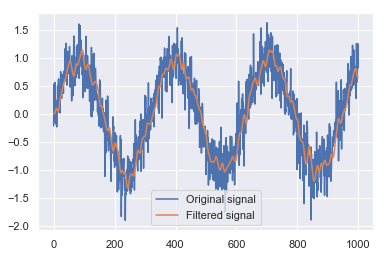

In [56]:
b, a = low_pass_filter
signal_filtered = scipy.signal.lfilter(b, a, signal)
plt.plot(signal, label='Original signal')
plt.plot(signal_filtered, label='Filtered signal')
plt.legend()
plt.show()

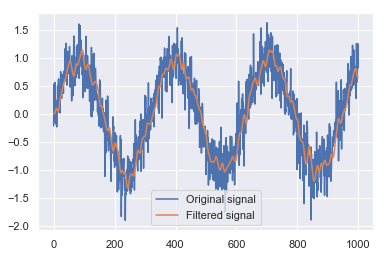

12.6 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [68]:
lp_sos = scipy.signal.butter(3, frequency_cutoff, fs=frequency_sampling, output='sos')
signal_filtered = scipy.signal.sosfilt(lp_sos, signal)
plt.plot(signal, label='Original signal')
plt.plot(signal_filtered, label='Filtered signal')
plt.legend()
plt.show()

%timeit signal_filtered = scipy.signal.sosfilt(lp_sos, signal[:100])

# High-pass filtering

TBD